### Read and explore the datasets

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quilt
import seaborn as sns
import missingno as msno
import plotly.offline
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')
import cufflinks
import geopandas as gp
#init_notebook_mode

# pip install cufflinks
# pip install plotly_express
# cufflinks.__version__
# pip install cufflinks --upgrade
# pip install python-quilt
# pip install missingno

In [143]:
#Read datasets, no description available. ALl files available at 
# http://www.tsb.gc.ca/eng/stats/aviation/data-5.html. Adding conditions as warning
# received: Columns (+30 in total)have mixed types. Specify dtype option on 
# import or set low_memory=False.


df1 = pd.read_csv('ASISdb_MDOTW_VW_OCCURRENCE_PUBLIC.csv') 
#                   sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
df2 = pd.read_csv('ASISdb_MDOTW_VW_AIRCRAFT_PUBLIC.csv')
#                  sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
#df3 = pd.read_csv('ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv')
#df4 = pd.read_csv('ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv')
dfo = pd.read_csv('23100018.csv')

In [144]:
#pip install plotly_express

In [145]:
#pip install cufflinks

In [146]:
#cufflinks.__version__

In [147]:
#plotly.__version__

In [148]:
#dfa.head()

In [149]:
#Rename occid
df2 = df2.rename(index=str, columns={"occid": "OccID"})

In [150]:
df2.shape

(57227, 194)

In [151]:
df2.head()

,OccID,OccNo,AcID,AircraftID,AircraftVersion,RowStatus,RegistrationNo,SerialNo,AircraftTypeID,AircraftTypeID_DisplayEng,...,ReqSepTime,ActualSepHorizontal,ActualSepHorizontalEnum,ActualSepHorizontalEnum_DisplayEng,ActualSepHorizontalEnum_DisplayFre,ActualSepVertical,ActualSepTime,AtsUnitInvolvedEnum,AtsUnitInvolvedEnum_DisplayEng,AtsUnitInvolvedEnum_DisplayFre
0,152828,A19P0071,43955,106710,9.0,1,C-GJAZ,15036,1.0,AEROPLANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,152827,A19W0070,67261,131335,2.0,1,C-FANF,27417,1.0,AEROPLANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,152826,A19P0070,67259,131334,2.0,1,C-FQNG,61032,3.0,HELICOPTER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,152825,A19P0069,65985,130580,2.0,1,N403UA,442,1.0,AEROPLANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,152822,A19C0063,43825,106425,2.0,1,C-FARE,53112,3.0,HELICOPTER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df2.columns

Index(['OccID', 'OccNo', 'AcID', 'AircraftID', 'AircraftVersion', 'RowStatus',
       'RegistrationNo', 'SerialNo', 'AircraftTypeID',
       'AircraftTypeID_DisplayEng',
       ...
       'ReqSepTime', 'ActualSepHorizontal', 'ActualSepHorizontalEnum',
       'ActualSepHorizontalEnum_DisplayEng',
       'ActualSepHorizontalEnum_DisplayFre', 'ActualSepVertical',
       'ActualSepTime', 'AtsUnitInvolvedEnum',
       'AtsUnitInvolvedEnum_DisplayEng', 'AtsUnitInvolvedEnum_DisplayFre'],
      dtype='object', length=194)

In [153]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57227 entries, 0 to 57226
Columns: 194 entries, OccID to AtsUnitInvolvedEnum_DisplayFre
dtypes: float64(79), int64(4), object(111)
memory usage: 85.1+ MB


In [154]:
df2u = df2.OccID.nunique()
print (df2u)

43854


In [155]:
# dfa_.reset_index().drop_duplicates().set_index(['OccId']) Doesn't work!

In [156]:
df1.shape

(47226, 246)

In [157]:
df1.head()

,OccID,OccNo,AirportID,AirportID_AirportName,AirportID_CountryID,AirportID_CountryID_DisplayEng,AirportID_CountryID_DisplayFre,Airport_ProvinceID,AirportID_ProvinceID_DisplayEng,AirportID_ProvinceID_DisplayFre,...,InitialPositionEnum_DisplayFre,FinalPositionEnum,FinalPositionEnum_DisplayEng,FinalPositionEnum_DisplayFre,FullProcedureIND,FullProcedureIND_DisplayEng,FullProcedureIND_DisplayFre,SurfaceContaminationID,SurfaceContaminationID_DisplayEng,SurfaceContaminationID_DisplayFre
0,152828,A19P0071,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,152826,A19P0070,109.0,(CAMPBELL ISLAND),2.0,CANADA,CANADA,12.0,BRITISH COLUMBIA,COLOMBIE-BRITANNIQUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,152825,A19P0069,1912.0,Vancouver Intl,2.0,CANADA,CANADA,12.0,BRITISH COLUMBIA,COLOMBIE-BRITANNIQUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df1.columns

Index(['OccID', 'OccNo', 'AirportID', 'AirportID_AirportName',
       'AirportID_CountryID', 'AirportID_CountryID_DisplayEng',
       'AirportID_CountryID_DisplayFre', 'Airport_ProvinceID',
       'AirportID_ProvinceID_DisplayEng', 'AirportID_ProvinceID_DisplayFre',
       ...
       'InitialPositionEnum_DisplayFre', 'FinalPositionEnum',
       'FinalPositionEnum_DisplayEng', 'FinalPositionEnum_DisplayFre',
       'FullProcedureIND', 'FullProcedureIND_DisplayEng',
       'FullProcedureIND_DisplayFre', 'SurfaceContaminationID',
       'SurfaceContaminationID_DisplayEng',
       'SurfaceContaminationID_DisplayFre'],
      dtype='object', length=246)

### Finding unique values on datasets

In [159]:
df1u = df1.OccID.nunique()

In [160]:
unique_ = pd.DataFrame({'Dataset' :["AC","EVE"],#"OCC","SUR"], 
                        "Unique":[df1u,df2u]})#df3u,df4u
unique_.sort_values(by="Unique", ascending=False)

,Dataset,Unique
0,AC,43855
1,EVE,43854


### Merging the two datasets with accidents information

In [197]:
dfm = df1.merge(df2, how='left', left_on=('OccID','OccNo'), right_on=('OccID','OccNo'))

In [198]:
dfm #dfm.TotalFatalCount

,OccID,OccNo,AirportID,AirportID_AirportName,AirportID_CountryID,AirportID_CountryID_DisplayEng,AirportID_CountryID_DisplayFre,Airport_ProvinceID,AirportID_ProvinceID_DisplayEng,AirportID_ProvinceID_DisplayFre,...,ReqSepTime,ActualSepHorizontal,ActualSepHorizontalEnum,ActualSepHorizontalEnum_DisplayEng,ActualSepHorizontalEnum_DisplayFre,ActualSepVertical,ActualSepTime,AtsUnitInvolvedEnum,AtsUnitInvolvedEnum_DisplayEng,AtsUnitInvolvedEnum_DisplayFre
0,152828,A19P0071,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,152827,A19W0070,1984.0,Erik Nielsen Intl,2.0,CANADA,CANADA,24.0,YUKON,YUKON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,152826,A19P0070,109.0,(CAMPBELL ISLAND),2.0,CANADA,CANADA,12.0,BRITISH COLUMBIA,COLOMBIE-BRITANNIQUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,152825,A19P0069,1912.0,Vancouver Intl,2.0,CANADA,CANADA,12.0,BRITISH COLUMBIA,COLOMBIE-BRITANNIQUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,152822,A19C0063,1366.0,POINTS NORTH LANDING,2.0,CANADA,CANADA,10.0,SASKATCHEWAN,SASKATCHEWAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,152820,A19C0062,2001.0,James Armstrong Richardson Intl,2.0,CANADA,CANADA,9.0,MANITOBA,MANITOBA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,152819,A19Q0085,433.0,Pierre Elliott Trudeau Intl,2.0,CANADA,CANADA,4.0,QUEBEC,QUEBEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,152818,A19Q0084,1448.0,Jean Lesage Intl,2.0,CANADA,CANADA,4.0,QUEBEC,QUEBEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,152814,A19F0155,4440.0,Ioannis Kapodistrias Intl,186.0,GREECE,GRECE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing dataset with information about movements

In [199]:
dfo.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Class of operation',
       'Rank and number of movements', 'UOM', 'UOM_ID', 'SCALAR_FACTOR',
       'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL',
       'TERMINATED', 'DECIMALS'],
      dtype='object')

In [200]:
tot = dfo.groupby(['GEO', 'Class of operation'])

In [165]:
tot.first()

REF_DATE  \
GEO                                                Class of operation                               
Abbotsford, British Columbia                       Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Alberta                                            Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Boundary Bay, British Columbia                     Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
British Columbia                                   Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Calgary International, Alberta                     Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Calgary/Springbank, Alberta                        Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Chicoutimi/St-Honoré, Quebec                       Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Edmonton City Centre, Alberta                      Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Edmonton International, Alberta                    Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Edmonton/Villeneuve, Alberta                       Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
...                                                                                           ...   
Total Canadian airports                            Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Vancouver Harbour, British Columbia                Itinerant movements                       1997   
                                                   Local movements                           1997   
                                                   Total, itinerant and local movements      1997   
Vancouver International, British Columbia          Itinerant movements                       1997   
                                                 

In [166]:
tot.get_group('Total Canadian airports')

ValueError: must supply a tuple to get_group with multiple grouping keys

In [ ]:
# from functools import reduce
# dfm = reduce(lambda left,right: pd.merge(left,right, on='OccID',how='inner'), dfs)

In [201]:
dfm.shape

(68258, 438)

In [202]:
dfm.drop_duplicates(subset ="OccID", 
                     keep = False, inplace = True) 
#df.dropna(inplace = True)

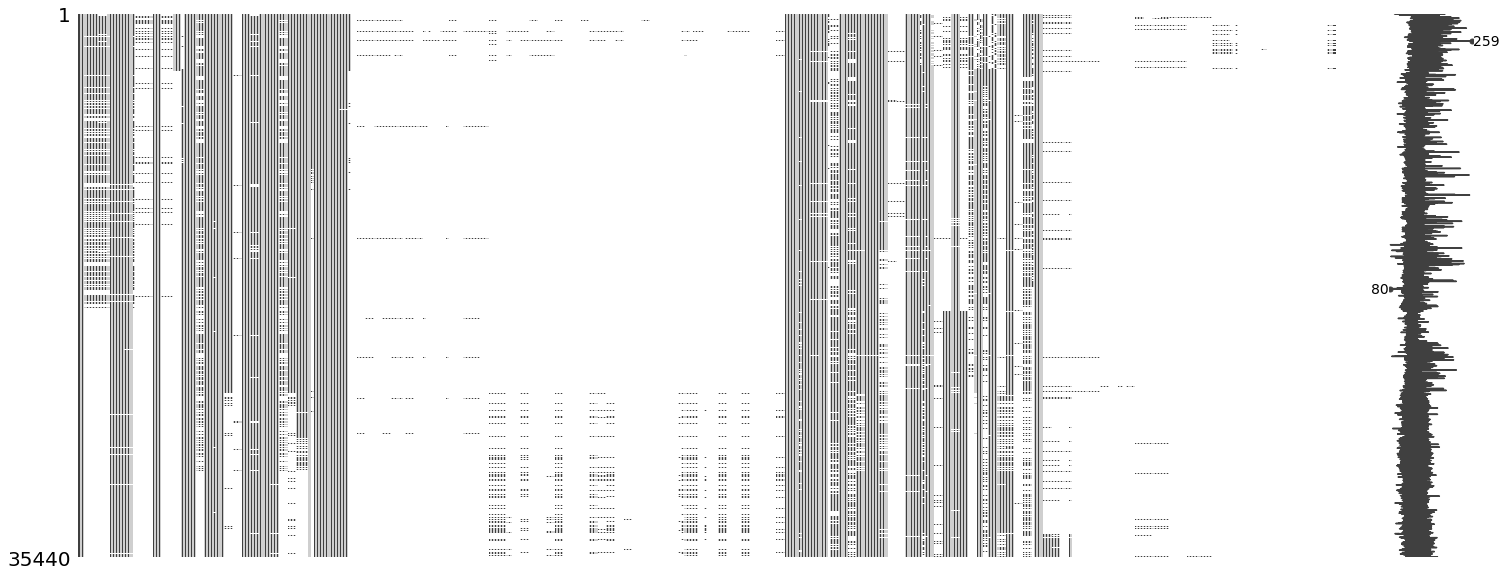

In [203]:
msno.matrix(dfm)

In [204]:
dfm.shape

(35440, 438)

In [229]:
dfm.Latitude.isnull().sum()

1150

In [230]:
dfm.Latitude.fillna(0, inplace=True)

In [232]:
dfm.Longitude.fillna(0, inplace=True)

In [239]:
dfp = dfm.drop(dfm.columns[dfm.apply(lambda col: col.isnull().sum() > 200)], axis=1)

In [240]:
dfp.shape

(35440, 60)

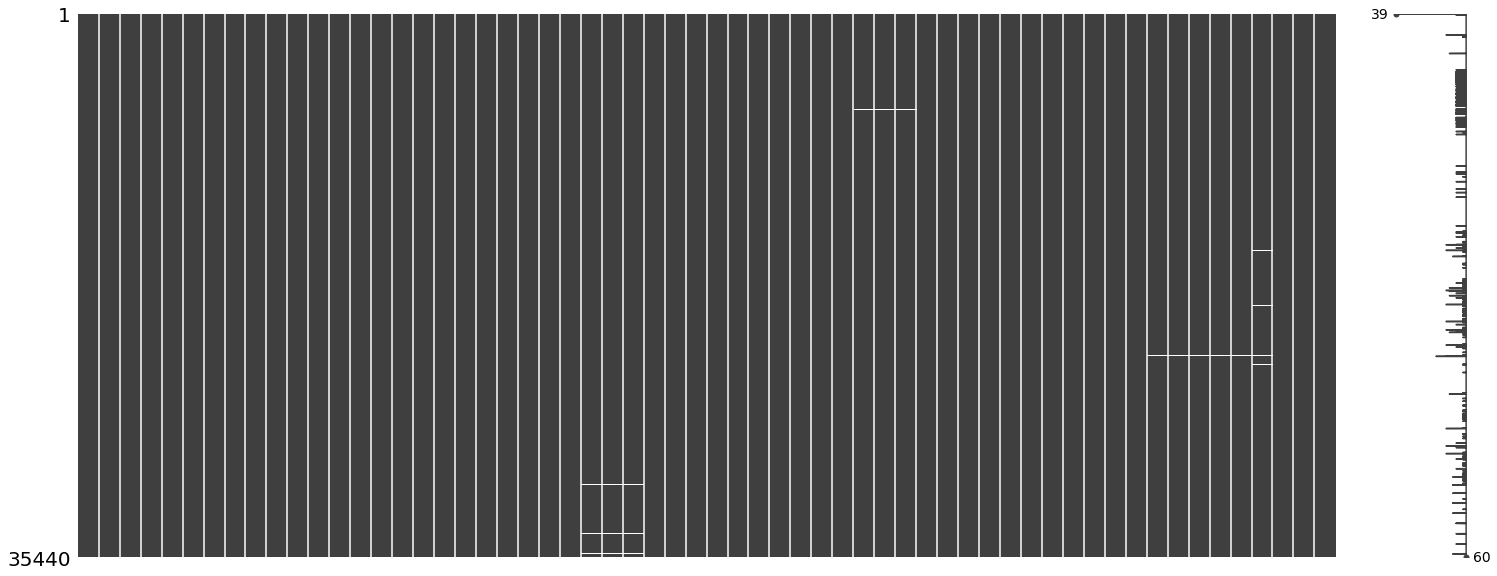

In [241]:
msno.matrix(dfp)

In [236]:
dfp.columns

Index(['OccID', 'OccNo', 'Latitude', 'Longitude', 'CountryID',
       'CountryID_DisplayEng', 'CountryID_DisplayFre', 'OccClassID',
       'OccClassID_DisplayEng', 'OccClassID_DisplayFre', 'OccDate',
       'OccRegionID', 'OccRegionID_DisplayEng', 'OccRegionID_DisplayFre',
       'OccTime', 'OccTypeID', 'OccTypeID_DisplayEng', 'OccTypeID_DisplayFre',
       'PositionTypeEnum', 'PositionTypeEnum_DisplayEng',
       'PositionTypeEnum_DisplayFre', 'InitTSBNotifDate', 'ReportedByID',
       'ReportedByID_DisplayEng', 'ReportedByID_DisplayFre', 'RespRegionID',
       'RespRegionID_DisplayEng', 'RespRegionID_DisplayFre', 'Summary',
       'TotalFatalCount', 'TotalMinorCount', 'TotalNoneCount',
       'TotalSeriousCount', 'TotalUnknownCount', 'NoAircraftInvolved',
       'InjuriesEnum', 'InjuriesEnum_DisplayEng', 'InjuriesEnum_DisplayFre',
       'DeployedEnum', 'DeployedEnum_DisplayEng', 'DeployedEnum_DisplayFre',
       'AcID', 'AircraftID', 'AircraftVersion', 'RowStatus', 'RegistrationNo',

In [248]:
Long = dfm.Longitude * -1

Text(0.5,1,'Lat and Longs')

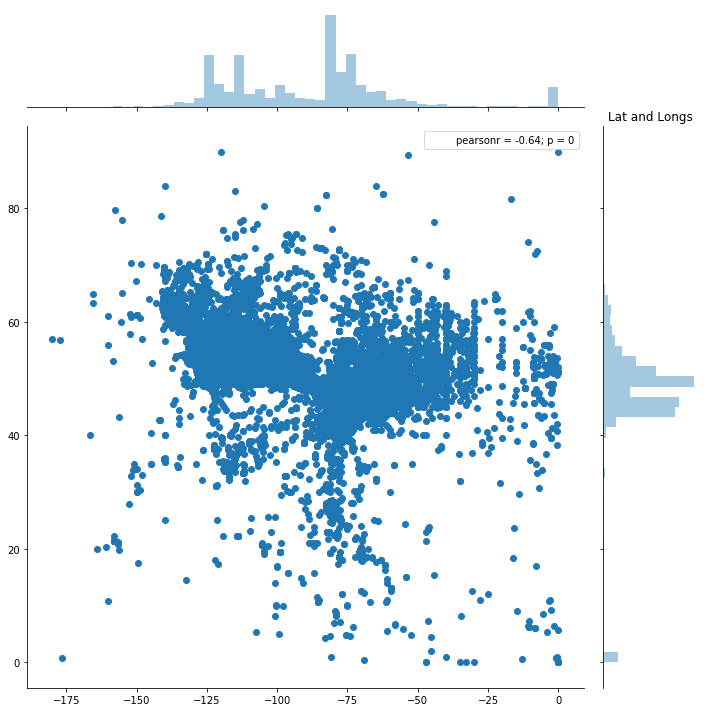

In [260]:
sns.jointplot(x=Long.values, y=dfp.Latitude.values, size = 10)
plt.title('Lat and Longs')

In [262]:
dfp.sample(5)

,OccID,OccNo,Latitude,Longitude,CountryID,CountryID_DisplayEng,CountryID_DisplayFre,OccClassID,OccClassID_DisplayEng,OccClassID_DisplayFre,...,RegCountryID_DisplayFre,WeightCategoryID,WeightCategoryID_DisplayEng,WeightCategoryID_DisplayFre,WeightCategoryID_MaxWeightCat,WeightCategoryID_MinWeightCat,NumberOfEngine,DangerousGoodEnum,DangerousGoodEnum_DisplayEng,DangerousGoodEnum_DisplayFre
61161,55093,A85O0048,43.050000,81.250000,2,CANADA,CANADA,7,HISTORICALLY UNSPECIFIED,NON SPÉCIFIÉ HISTORIQUEMENT,...,CANADA,1.0,0-2250 KG (0-4960 LBS),0-2250 KG (0-4960 LVS),2250.0,0.0,1.0,2.0,No,Non
14852,134137,A08A0114,0.000000,0.000000,2,CANADA,CANADA,12,CLASS 5,CLASSE 5,...,CANADA,1.0,0-2250 KG (0-4960 LBS),0-2250 KG (0-4960 LVS),2250.0,0.0,1.0,3.0,Unknown,Inconnue
57450,60337,A88P0295,49.183333,123.166667,2,CANADA,CANADA,6,CLASS C-5,CLASSE C-5,...,CANADA,4.0,27001-272000 KG (59526-599650 LBS),27001-272000 KG (59526-599650 LVS),272000.0,27001.0,2.0,2.0,No,Non
62286,53304,A83Q0071,48.650000,71.150000,2,CANADA,CANADA,7,HISTORICALLY UNSPECIFIED,NON SPÉCIFIÉ HISTORIQUEMENT,...,CANADA,2.0,2251-5700 KG (4961-12565 LBS),2251-5700 KG (4961-12565 LVS),5700.0,2251.0,1.0,2.0,No,Non
57967,59631,A88O0088,45.316667,75.666667,2,CANADA,CANADA,6,CLASS C-5,CLASSE C-5,...,CANADA,4.0,27001-272000 KG (59526-599650 LBS),27001-272000 KG (59526-599650 LVS),272000.0,27001.0,2.0,2.0,No,Non


In [263]:
dfp['OccDate'] = le.fit_transform(dfp['OccDate'].astype(str))
LabelEncoder()
le.classes_
dfp['OccDate'] = pd.to_datetime(dfp['OccDate'])

In [264]:
dfp.shape


(35440, 60)

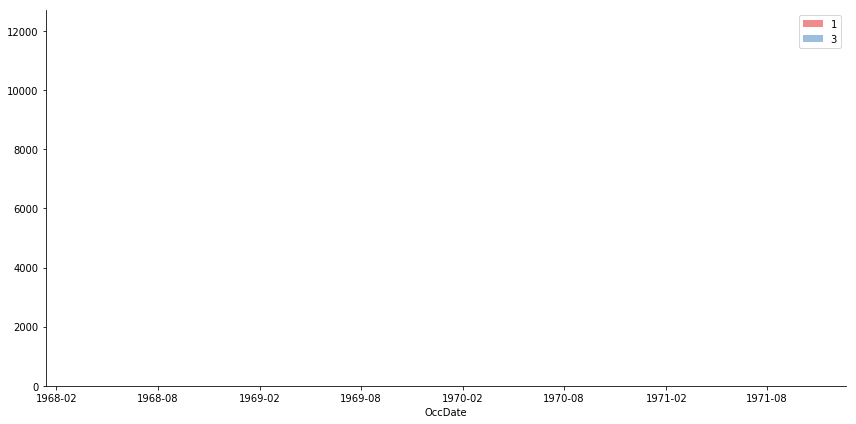

In [266]:
g = sns.FacetGrid(dfp,hue='OccTypeID',palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'OccDate',bins=100,alpha=0.5)
plt.legend()

In [84]:
#df = pd.to_datetime(df['OccDate'], errors='coerce')


In [94]:
#importing plotly and cufflinks in offline mode
import plotly as py
import cufflinks as cf
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [95]:
#Removed as there are few occurrences before 1976
#dfm.OccDate.dt.year.iplot(kind='histogram', bins=40, theme='white', title='Ocurrences per year')

In [96]:
# Drop prior to 1976
old = dfm[(dfm.OccDate.dt.year < 1976)].index
dfm.drop(old, inplace=True)

In [97]:
dfm.OccDate.dt.year.iplot(kind='histogram', bins=50, theme='white', title='Ocurrences per year')

In [98]:
#plt.hist(df['OccTypeID_DisplayEng']);
#sns.distplot( a=df["OccTypeID_DisplayEng"], hist=True, kde=False, rug=False )
#sns.scatter(x='OccTypeID_DisplayEng', data=df)
#px.bar(df, x='OccTypeID_DisplayEng', template='plotly_white')
#df.OccTypeID_DisplayEng.iplot(kind='histogram', bins=50, theme='white', title='Ocurrences per type')
#px.histogram(df, x='OperatorTypeID_DisplayEng', color='OccTypeID_DisplayEng',template='plotly')

TypeError: cannot perform reduce with flexible type

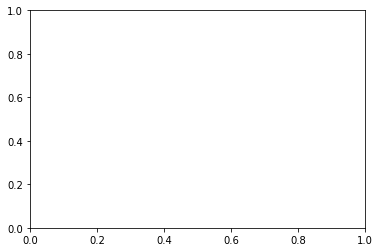

In [99]:
#px.histogram(, x='OrganizationID_DisplayEng', y='OccTypeID_DisplayEng') 
sns.distplot(["OccTypeID"])

In [ ]:
# g = sns.FacetGrid(,hue='OccTypeID_DisplayEng',palette='Set1',size=8,aspect=2)
# g = g.map(plt.hist,'TotalFatalCount', bins=20,alpha=0.5)
# plt.legend()

In [ ]:
#dfen.TotalFatalCount

In [ ]:
dfa.corr('pearson')

In [ ]:
# sns.heatmap(dfa.isnull(), cbar=False)

In [ ]:
px.scatter(dfm, x='TotalFatalCount', y="OrganizationID_DisplayEng", 
                   size='TotalFatalCount', size_max=60)
#Get another graph for <100 fatalities

In [ ]:
plt.scatter(dfm.OccTypeID_DisplayEng, dfm.OperationTypeID_DisplayEng)
#Get another graph for <100 fatalities

### Preprocessing for classification and clustering

In [30]:
#Select relevant features, USE df=df[]!!!! Remove index for model setup
dfa = dfm[['OccID','AircraftTypeID','AircraftMakeID','OrganizationID', 'OperationTypeID',
           'OperatorTypeID', 'WeightCategoryID','YearOfManuf','NumberOfEngine', 
          'MaxTakeOffWeight','NumberOfEngine', 'OccDate', 'OccTime','Latitude','Longitude', 
           'DamageLevelID','WakeTurbulenceCategoryID', 'DangerousGoodEnum',
           'TotalFatalCount', 'OccTypeID']]#'DepartAirportID','DestAirportID','LandingGearID'
dfa.head()

,OccID,AircraftTypeID,AircraftMakeID,OrganizationID,OperationTypeID,OperatorTypeID,WeightCategoryID,YearOfManuf,NumberOfEngine,MaxTakeOffWeight,NumberOfEngine,OccDate,OccTime,Latitude,Longitude,DamageLevelID,WakeTurbulenceCategoryID,DangerousGoodEnum,TotalFatalCount,OccTypeID
0,152828,1.0,56245.0,60343.0,1.0,5.0,4.0,2005,2.0,38329.0,2.0,6/11/2019 12:00:00 AM,13:35:00,56.550000,129.260000,4.0,2.0,3.0,0,3
3,152826,3.0,56962.0,65347.0,16.0,5.0,3.0,1960,2.0,8618.0,2.0,5/24/2019 12:00:00 AM,12:00:00,52.185000,128.156667,4.0,2.0,2.0,0,3
4,152825,1.0,53388.0,58286.0,1.0,5.0,4.0,1993,2.0,75500.0,2.0,6/12/2019 12:00:00 AM,14:40:00,49.194722,123.183889,4.0,2.0,3.0,0,3
5,152822,3.0,56219.0,100517.0,22.0,5.0,2.0,1997,1.0,2495.0,1.0,6/11/2019 12:00:00 AM,13:00:00,58.276667,104.082500,4.0,1.0,2.0,0,3
6,152820,1.0,50294.0,59873.0,1.0,5.0,4.0,2016,2.0,79015.0,2.0,6/9/2019 12:00:00 AM,13:30:00,49.910000,97.240000,4.0,2.0,2.0,0,3


In [31]:
dfa.shape

(35440, 20)

In [32]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35440 entries, 0 to 68257
Data columns (total 20 columns):
OccID                       35440 non-null int64
AircraftTypeID              35437 non-null float64
AircraftMakeID              34640 non-null float64
OrganizationID              25795 non-null float64
OperationTypeID             33032 non-null float64
OperatorTypeID              33364 non-null float64
WeightCategoryID            35419 non-null float64
YearOfManuf                 30611 non-null object
NumberOfEngine              35288 non-null float64
MaxTakeOffWeight            34304 non-null float64
NumberOfEngine              35288 non-null float64
OccDate                     35440 non-null object
OccTime                     35164 non-null object
Latitude                    34290 non-null float64
Longitude                   34294 non-null float64
DamageLevelID               34548 non-null float64
WakeTurbulenceCategoryID    34307 non-null float64
DangerousGoodEnum           3

In [33]:
dfa.drop_duplicates(subset ="OccID", 
                     keep = False, inplace = True) 
#df.dropna(inplace = True)

In [34]:
dfa = dfa.drop(['OccID'], axis=1)

In [35]:
dfa.shape

(35440, 19)

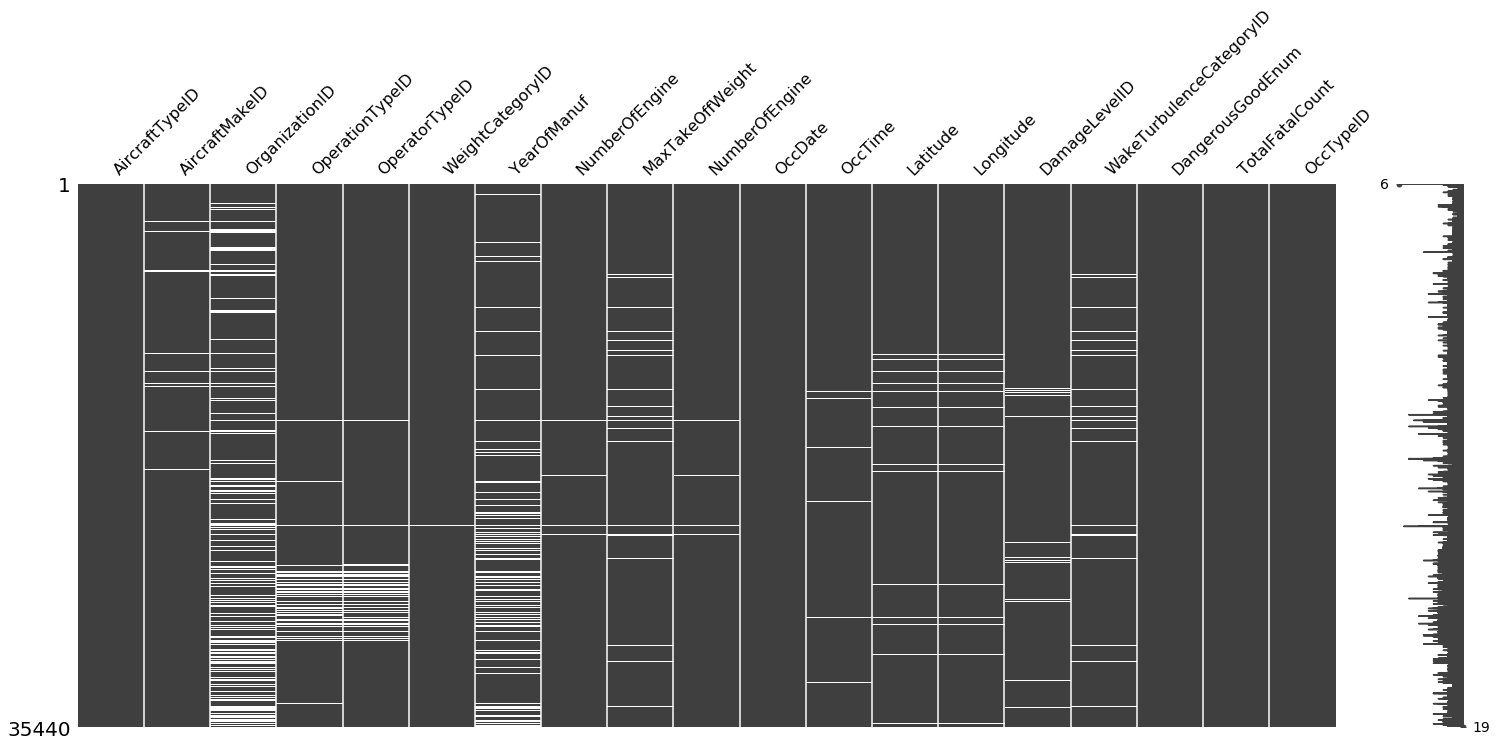

In [36]:
msno.matrix(dfa)

In [37]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

In [38]:
# instantiate labelencoder object
le = LabelEncoder()

In [40]:
dfa.fillna(0, inplace=True)

In [41]:
dfa

,AircraftTypeID,AircraftMakeID,OrganizationID,OperationTypeID,OperatorTypeID,WeightCategoryID,YearOfManuf,NumberOfEngine,MaxTakeOffWeight,NumberOfEngine,OccDate,OccTime,Latitude,Longitude,DamageLevelID,WakeTurbulenceCategoryID,DangerousGoodEnum,TotalFatalCount,OccTypeID
0,1.0,56245.0,60343.0,1.0,5.0,4.0,2005,2.0,38329.0,2.0,6/11/2019 12:00:00 AM,13:35:00,56.550000,129.260000,4.0,2.0,3.0,0,3
3,3.0,56962.0,65347.0,16.0,5.0,3.0,1960,2.0,8618.0,2.0,5/24/2019 12:00:00 AM,12:00:00,52.185000,128.156667,4.0,2.0,2.0,0,3
4,1.0,53388.0,58286.0,1.0,5.0,4.0,1993,2.0,75500.0,2.0,6/12/2019 12:00:00 AM,14:40:00,49.194722,123.183889,4.0,2.0,3.0,0,3
5,3.0,56219.0,100517.0,22.0,5.0,2.0,1997,1.0,2495.0,1.0,6/11/2019 12:00:00 AM,13:00:00,58.276667,104.082500,4.0,1.0,2.0,0,3
6,1.0,50294.0,59873.0,1.0,5.0,4.0,2016,2.0,79015.0,2.0,6/9/2019 12:00:00 AM,13:30:00,49.910000,97.240000,4.0,2.0,2.0,0,3
7,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,6/10/2019 12:00:00 AM,16:27:00,45.470556,73.740833,0.0,0.0,0.0,0,3
8,1.0,50668.0,60218.0,1.0,5.0,2.0,1997,1.0,4500.0,1.0,6/12/2019 12:00:00 AM,11:40:00,46.791111,71.393333,2.0,1.0,3.0,0,3
9,1.0,50294.0,62861.0,1.0,5.0,4.0,2014,2.0,79015.0,2.0,6/7/2019 12:00:00 AM,19:55:00,39.601944,19.911667,4.0,2.0,2.0,0,3
10,7.0,54362.0,0.0,0.0,4.0,1.0,1990,1.0,188.0,1.0,6/11/2019 12:00:00 AM,17:00:00,47.206389,55.397778,5.0,1.0,3.0,0,1
11,1.0,50371.0,100515.0,1.0,5.0,3.0,2002,2.0,9163.0,2.0,6/11/2019 12:00:00 AM,16:55:00,45.470556,73.740833,4.0,2.0,2.0,0,3


In [42]:
#  = .replace('', np.nan)

In [43]:
dfa.isnull().sum()


AircraftTypeID              0
AircraftMakeID              0
OrganizationID              0
OperationTypeID             0
OperatorTypeID              0
WeightCategoryID            0
YearOfManuf                 0
NumberOfEngine              0
MaxTakeOffWeight            0
NumberOfEngine              0
OccDate                     0
OccTime                     0
Latitude                    0
Longitude                   0
DamageLevelID               0
WakeTurbulenceCategoryID    0
DangerousGoodEnum           0
TotalFatalCount             0
OccTypeID                   0
dtype: int64

In [44]:
# .isnan().sum()

In [45]:
# le[fit..AircraftTypeID_DisplayEng]
# list(le.classes_)
# #le.transform(df['AircraftTypeID_DisplayEng'])

In [46]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# # ['AircraftTypeID_DisplayEng']
# # le.fit(['AircraftTypeID_DisplayEng'])
# # ['AircraftTypeID_DisplayEng'] = le.fit_transform(['AircraftTypeID_DisplayEng'].astype(str))
# # LabelEncoder()
# # le.classes_

# # array([1, 2, 6])
# #le.transform(['AircraftTypeID_DisplayEng'].astype(str)) 
# # array([0, 0, 1, 2]...)
# # le.inverse_transform([0, 0, 1, 2])
# # array([1, 1, 2, 6])

In [47]:
# ['AircraftMakeID_DisplayEng'] = le.fit_transform(['AircraftMakeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [48]:
# ['OrganizationID_DisplayEng'] = le.fit_transform(['OrganizationID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [49]:
# ['OperatorTypeID_DisplayEng'] = le.fit_transform(['OperatorTypeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [50]:
# ['OperationTypeID_DisplayEng'] = le.fit_transform(['OperationTypeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [51]:
# ['OccTypeID_DisplayEng'] = le.fit_transform(['OccTypeID_DisplayEng'].astype(str))
# LabelEncoder()
# le.classes_

In [52]:
# ['YearOfManuf'] = le.fit_transform(['YearOfManuf'].astype(str))
# LabelEncoder()
# le.classes_

In [53]:
#Finding missing values on YearofManuf
# .YearOfManuf.isnull().sum().sum()

In [54]:
# from sklearn.impute import SimpleImputer

In [55]:
# imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')

In [56]:
#  = imp.fit_transform(.values)

In [57]:
dfa.head()

,AircraftTypeID,AircraftMakeID,OrganizationID,OperationTypeID,OperatorTypeID,WeightCategoryID,YearOfManuf,NumberOfEngine,MaxTakeOffWeight,NumberOfEngine,OccDate,OccTime,Latitude,Longitude,DamageLevelID,WakeTurbulenceCategoryID,DangerousGoodEnum,TotalFatalCount,OccTypeID
0,1.0,56245.0,60343.0,1.0,5.0,4.0,2005,2.0,38329.0,2.0,6/11/2019 12:00:00 AM,13:35:00,56.550000,129.260000,4.0,2.0,3.0,0,3
3,3.0,56962.0,65347.0,16.0,5.0,3.0,1960,2.0,8618.0,2.0,5/24/2019 12:00:00 AM,12:00:00,52.185000,128.156667,4.0,2.0,2.0,0,3
4,1.0,53388.0,58286.0,1.0,5.0,4.0,1993,2.0,75500.0,2.0,6/12/2019 12:00:00 AM,14:40:00,49.194722,123.183889,4.0,2.0,3.0,0,3
5,3.0,56219.0,100517.0,22.0,5.0,2.0,1997,1.0,2495.0,1.0,6/11/2019 12:00:00 AM,13:00:00,58.276667,104.082500,4.0,1.0,2.0,0,3
6,1.0,50294.0,59873.0,1.0,5.0,4.0,2016,2.0,79015.0,2.0,6/9/2019 12:00:00 AM,13:30:00,49.910000,97.240000,4.0,2.0,2.0,0,3


In [58]:
# from sklearn_pandas import CategoricalImputer
# data = 
# imputer = CategoricalImputer()
# imputer.fit_transform(data)


In [59]:
# #Removing timestamp from OccDate
# ['OccDate'] = pd.to_datetime(['OccDate'])


In [60]:
dfa['YearOfManuf'] = le.fit_transform(dfa['YearOfManuf'].astype(str))
LabelEncoder()
le.classes_

array(['    ', '0', '1900.0', '1918.0', '1929.0', '1933.0', '1935.0',
       '1936.0', '1937.0', '1938', '1938.0', '1939', '1939.0', '1940',
       '1940.0', '1941', '1941.0', '1942', '1942.0', '1943', '1943.0',
       '1944', '1944.0', '1945', '1945.0', '1946', '1946.0', '1947',
       '1947.0', '1948', '1948.0', '1949', '1949.0', '1950', '1950.0',
       '1951', '1951.0', '1952', '1952.0', '1953', '1953.0', '1954',
       '1954.0', '1955', '1955.0', '1956', '1956.0', '1957', '1957.0',
       '1958', '1958.0', '1959', '1959.0', '1960', '1960.0', '1961',
       '1961.0', '1962', '1962.0', '1963', '1963.0', '1964', '1964.0',
       '1965', '1965.0', '1966', '1966.0', '1967', '1967.0', '1968',
       '1968.0', '1969', '1969.0', '1970', '1970.0', '1971', '1971.0',
       '1972', '1972.0', '1973', '1973.0', '1974', '1974.0', '1975',
       '1975.0', '1976', '1976.0', '1977', '1977.0', '1978', '1978.0',
       '1979', '1979.0', '1980', '1980.0', '1981', '1981.0', '1982',
       '1982.0', '1

In [61]:
dfa['YearOfManuf'] = pd.to_numeric(dfa['YearOfManuf'])

In [62]:
dfa['OccDate'] = le.fit_transform(dfa['OccDate'].astype(str))
LabelEncoder()
le.classes_

array(['1/1/1976 12:00:00 AM', '1/1/1977 12:00:00 AM',
       '1/1/1978 12:00:00 AM', ..., '9/9/2016 12:00:00 AM',
       '9/9/2017 12:00:00 AM', '9/9/2018 12:00:00 AM'], dtype=object)

In [63]:
#dfa['OccDate'] = pd.to_datetime(dfa['OccDate'])

In [64]:
dfa['OccTime'] = le.fit_transform(dfa['OccTime'].astype(str))
LabelEncoder()
le.classes_

array(['0', '00:00:00', '00:01:00', ..., '23:57:00', '23:58:00',
       '23:59:00'], dtype=object)

In [65]:
#dfa['OccTime'] = pd.to_numeric(dfa['OccTime'])

In [66]:
#Create new column with only Date
dfm['Date'] = dfm['OccDate'].dt.date

In [67]:
# = imp.fit_transform() 

In [68]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35440 entries, 0 to 68257
Data columns (total 19 columns):
AircraftTypeID              35440 non-null float64
AircraftMakeID              35440 non-null float64
OrganizationID              35440 non-null float64
OperationTypeID             35440 non-null float64
OperatorTypeID              35440 non-null float64
WeightCategoryID            35440 non-null float64
YearOfManuf                 35440 non-null int32
NumberOfEngine              35440 non-null float64
MaxTakeOffWeight            35440 non-null float64
NumberOfEngine              35440 non-null float64
OccDate                     35440 non-null int32
OccTime                     35440 non-null int32
Latitude                    35440 non-null float64
Longitude                   35440 non-null float64
DamageLevelID               35440 non-null float64
WakeTurbulenceCategoryID    35440 non-null float64
DangerousGoodEnum           35440 non-null float64
TotalFatalCount             35

In [69]:
#Inferring dtypes
#  = .infer_objects()
# .dtypes

In [70]:
dfa.shape

(35440, 19)

In [71]:
# print ([pd.to_numeric(.OccTypeID_DisplayEng, errors='coerce').isnull()])
# #pd.to_numeric(df['OccTypeID_DisplayEng'])

In [72]:
# non_numeric = df.OrganizationID_DisplayEng.compile(r'[^\d.]+')
# #df = pd.DataFrame({'a': [3,2,'NA']})
# df.iloc[df['a'].str.contains(non_numeric)]

#print ([pd.to_numeric(.OccDate)])

In [73]:
# .OccTypeID_DisplayEng is bool

In [74]:
# .OccTypeID_DisplayEng is str

In [75]:
# .OccTypeID_DisplayEng is int

In [76]:
# .OccTypeID_DisplayEng is dict

In [77]:
#Total of missing values

dfa.isnull().sum().sum()

0

In [78]:
dfa.nunique()

AircraftTypeID                 13
AircraftMakeID                697
OrganizationID               3164
OperationTypeID                25
OperatorTypeID                  9
WeightCategoryID                6
YearOfManuf                   166
NumberOfEngine                  6
MaxTakeOffWeight             2131
NumberOfEngine                  6
OccDate                     13626
OccTime                      1410
Latitude                     3049
Longitude                    5396
DamageLevelID                   7
WakeTurbulenceCategoryID        5
DangerousGoodEnum               4
TotalFatalCount                19
OccTypeID                       2
dtype: int64

In [79]:
dfa.describe()

,AircraftTypeID,AircraftMakeID,OrganizationID,OperationTypeID,OperatorTypeID,WeightCategoryID,YearOfManuf,NumberOfEngine,MaxTakeOffWeight,NumberOfEngine,OccDate,OccTime,Latitude,Longitude,DamageLevelID,WakeTurbulenceCategoryID,DangerousGoodEnum,TotalFatalCount,OccTypeID
count,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000,35440.000000
mean,1.362641,50994.676016,40764.001749,3.057957,4.361766,2.631574,83.313544,1.724492,47226.190293,1.724492,7216.226749,804.050141,47.329831,88.692261,4.080389,1.577201,2.494018,0.087077,2.096840
std,1.133482,8171.439777,25723.306535,4.411957,1.293220,1.282392,44.853406,0.798110,98679.181070,0.798110,3937.527432,307.898707,10.757329,28.736080,1.182254,0.719475,0.510140,0.677262,0.995314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,50371.000000,0.000000,1.000000,4.000000,1.000000,58.000000,1.000000,1633.000000,1.000000,3828.000000,603.000000,45.000000,73.733333,4.000000,1.000000,2.000000,0.000000,1.000000
50%,1.000000,50443.000000,52099.000000,1.000000,5.000000,3.000000,90.000000,2.000000,7350.000000,2.000000,7634.000000,828.000000,49.033333,81.150000,4.000000,2.000000,2.000000,0.000000,3.000000
75%,1.000000,54377.000000,56580.000000,3.000000,5.000000,4.000000,116.000000,2.000000,51800.000000,2.000000,10641.000000,1028.000000,51.416667,114.016667,5.000000,2.000000,3.000000,0.000000,3.000000
max,12.000000,58458.000000,100517.000000,24.000000,8.000000,5.000000,165.000000,8.000000,892872.000000,8.000000,13625.000000,1409.000000,90.000000,180.000000,6.000000,4.000000,3.000000,62.000000,3.000000


### Classify using RFC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# x_columns = 13
# x = .iloc[:,0:x_columns].values 
# y = .iloc[:,x_columns].values
# print(y)
#IndexingError: Too many indexers

In [ ]:
#Is target a class?
isinstance(dfa.OccTypeID, pd.DataFrame)

In [ ]:
#RFC complaining nan, infinite or value too large, look for nan
# np.isnan(np.sum())

In [ ]:
#Look for finite
# np.isfinite(np.sum())

In [ ]:
# 1=.fillna(0)
# 1.isnull().any()

In [ ]:
 dfa.dtypes

In [ ]:
x=dfa.drop(columns=['OccTypeID', 'TotalFatalCount']) #features
y=dfa.OccTypeID#target

In [ ]:
dfa.nunique()

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
#print(y)

In [ ]:
# encoder = LabelEncoder()
# # encoder.fit((x))
# # encoded_x = encoder.transform(x)
# # y.shape
# encoder.fit(y)
# encoded_y = encoder.transform(y)
# #dummy_y = np_utils.to_categorical(encoded_y,num_classes=7)
# # print(encoded_x)
# print(encoded_y)

In [ ]:
# unique_y =df['OccTypeID_DisplayEng'].unique()
# print(unique_y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6)

In [ ]:
model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0).fit(x_train, y_train)

In [ ]:
dfa.dtypes

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

In [ ]:
y_test

In [ ]:
model.score(x_test, y_test)

# Clustering

In [ ]:
from sklearn import neighbors
from sklearn.cluster import KMeans

In [ ]:
X_=x
sum_square = {}

for k in range(1, 10):
    kmeans_aviation = KMeans(n_clusters = k).fit(X_)
    sum_square[k] = kmeans_aviation.inertia_
print(X_.shape)
print(X_.columns)
print(X_.head)

In [ ]:
X_.head()

In [ ]:
plt.plot(list(sum_square.keys()), list(sum_square.values()),
         linestyle ='-', marker = 'o', color = 'b',
         markersize = 8,markerfacecolor = 'r')

In [ ]:
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_)
print('Cluster model K=5 inertia score is: ', kmeans_5.inertia_)
y=model.predict(X_)

In [ ]:
centers5 = kmeans_5.cluster_centers_
centers5

In [ ]:
dfa['klabels_5'] = kmeans_5.labels_

In [ ]:
dfa.columns

In [ ]:
X_.head()
#X_.shape

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

# For fitted with kmeans 
ax1.set_title('K Means (K = 5)')
ax1.scatter(x = dfa['AircraftTypeID'], y = dfa['AircraftMakeID'], 
            c = ['klabels_5'], cmap='rainbow')
ax1.scatter(x=centers5[:, 0], y=centers5[:, 1],
            c='black',s=300, alpha=0.5);

# For original data 
ax2.set_title("Original")
ax2.scatter(x = dfm['AircraftTypeID'], y = dfm['AircraftMakeID'], 
            c = ['AircraftMakeID'], cmap='rainbow')

In [ ]:
Y=dfa["target"]
y is your prediction
compare y and Y in the metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(['OccTypeID'], kmeans_5.labels_))

In [ ]:
X_.klabels_3.value_counts()

In [ ]:
#y.unique

In [ ]:
x.columns

In [ ]:
x.head()

In [ ]:
x_test.shape

In [ ]:
.03*7088